# Exam Code Toolkit

## Markov Stationary Distribution

In [11]:
import numpy as np

# Define the transfer matrix, P
P = np.array([[1/2, 1/4, 1/4],
              [1/2, 0, 1/2],
              [1/2, 1/4, 1/4]])

from numpy.linalg import eig

# Find the eigenvectors-eigenvalues
w, v = eig(np.transpose(P))

# Find the index of the eigenvalue equal to 1
for idx in range(len(w)):
    if abs(w[idx] - 1.0) < 1e-6: windex = idx

# Keep the eigenvector with unit eigenvalue
# and normalize it properly
result = v[:,windex]/v[:,windex].sum()

result

array([0.5, 0.2, 0.3])

## Gini Index

In [3]:
import numpy as np

Answer_1 = np.array([300,180]) # Format [+,-]
Answer_2 = np.array([80,440]) # Format [+,-]

Sum1 = Answer_1.sum()
Sum2 = Answer_2.sum()
TotSum = Sum1 + Sum2

Gini_1 = 1.0 - (Answer_1[0]/Sum1)**2 - (Answer_1[1]/Sum1)**2
Gini_2 = 1.0 - (Answer_2[0]/Sum2)**2 - (Answer_2[1]/Sum2)**2

Question = (Sum1*Gini_1 + Sum2*Gini_2)/TotSum

print(f'The Gini Index for Answer 1 = {Gini_1:.4f}.')
print(f'The Gini Index for Answer 2 = {Gini_2:.4f}.')

print(f'The Gini Index for the Question = {Question:.4f}.')

The Gini Index for Answer 1 = 0.4688.
The Gini Index for Answer 2 = 0.2604.
The Gini Index for the Question = 0.3604.


## Simulated Annealing

In [19]:
import numpy as np

# Define the studied function
def func(x):
    return x**4 + x**3 - 5.0*(x**2)-x+10.0
    #return 0.25*x**4 + (7.0/15.0)*x**3 - 0.8*x**2 - 0.8*x + 2.0 # <- sample exercise, for debugging

# Define the Temperature borders
Tstart, Tend = 2.0, 0.5
#Tstart, Tend = 2.0, 0.25 # <- sample exercise, for debugging

# Define the reduction percentage for the temperature
perc = 0.2
#perc = 0.3 # <- sample exercise, for debugging

# Define the starting x-point
xc = 0.8
#xc = 0.5 # <- sample exercise, for debugging

# Define the values used for proposed displacements
group_1 = [0.21,-0.45,-0.73,0.12,-0.5,-0.66,-0.98,0.25,0.37]
#group_1 = [-0.3040, 0.4923, -0.4430, -0.7023, -0.8728, -0.5724] # <- sample exercise, for debugging # -0.8868

# Define the values used to compare with resulting probability
group_2 = [0.434, 0.052, 0.167, 0.923, 0.076]
#group_2 = [0.0881, 0.7506, 0.0015] # <- sample exercise, for debugging

In [20]:
# Calculate the values of the temperature
Temps = []
T = Tstart
while T > Tend:
    Temps.append(T)
    T *= 1.0-perc
nsteps = len(Temps)

# Run the algorithm
Estart = func(xc)
gennumct = 0 # controls how many times we check group 2
for i in range(nsteps):
    print(f'Initiating step No. {i+1}.\n'+55*'*'+'\n')
    # Proposed step
    xprop = xc + group_1[i]
    Eprop = func(xprop)
    print(f'Proposed x = {xprop}, corresponding energy = {Eprop}')
    
    DE = Eprop-Estart
    # in this case the proposed energy is higher,
    # so Metropolis-Hastings has to check
    if DE > 0:
        print(f'DE is positive, i.e. the proposed energy is higher, so we perform the Metropolis-Hastings check.')
        Tc = Temps[i]
        pr = np.exp(-DE/Tc)
        gen_num = group_2[gennumct]
        gennumct += 1
        accepted = pr > gen_num
        if accepted:
            xc = xprop
            Estart = Eprop
            print(f'Calculated prob = {pr} > {gen_num}, so the step is accepted.')
            print(f'Current x = {xc}, current energy = {Estart}.\n')
        else:
            print(f'Calculated prob = {pr} < {gen_num}, so the step is NOT accepted.')
            print(f'Current x = {xc}, current energy = {Estart}.\n')
    else:
        # in this case, no need to check
        xc = xprop
        Estart = Eprop
        print(f'DE is negative, i.e. the proposed energy is lower, the step is automatically accepted.')
        print(f'Current x = {xc}, current energy = {Estart}.\n')

Initiating step No. 1.
*******************************************************

Proposed x = 1.01, corresponding energy = 5.96040501
DE is negative, i.e. the proposed energy is lower, the step is automatically accepted.
Current x = 1.01, current energy = 5.96040501.

Initiating step No. 2.
*******************************************************

Proposed x = 0.56, corresponding energy = 8.14596096
DE is positive, i.e. the proposed energy is higher, so we perform the Metropolis-Hastings check.
Calculated prob = 0.2551324469783652 < 0.434, so the step is NOT accepted.
Current x = 1.01, current energy = 5.96040501.

Initiating step No. 3.
*******************************************************

Proposed x = 0.28, corresponding energy = 9.35609856
DE is positive, i.e. the proposed energy is higher, so we perform the Metropolis-Hastings check.
Calculated prob = 0.07044763677324917 > 0.052, so the step is accepted.
Current x = 0.28, current energy = 9.35609856.

Initiating step No. 4.
******

## Bellman-Ford

ITERATION 0
Updating node A...
	Incoming from neighbor D. No better path found.	dist[D] + D-->A = inf + 15 = inf >= dist[A] = 0
	Incoming from neighbor Z. No better path found.	dist[Z] + Z-->A = inf + 9 = inf >= dist[A] = 0
Updating node D...
	Incoming from neighbor A. Found better path.  	dist[A] + A-->D = 0 + 15 = 15 < dist[D] = inf
	Incoming from neighbor B. No better path found.	dist[B] + B-->D = inf + 7 = inf >= dist[D] = 15
	Incoming from neighbor Z. No better path found.	dist[Z] + Z-->D = inf + 10 = inf >= dist[D] = 15
Updating node B...
	Incoming from neighbor D. Found better path.  	dist[D] + D-->B = 15 + 7 = 22 < dist[B] = inf
	Incoming from neighbor Z. No better path found.	dist[Z] + Z-->B = inf + 7 = inf >= dist[B] = 22
	Incoming from neighbor C. No better path found.	dist[C] + C-->B = inf + 3 = inf >= dist[B] = 22
Updating node Z...
	Incoming from neighbor B. Found better path.  	dist[B] + B-->Z = 22 + 7 = 29 < dist[Z] = inf
	Incoming from neighbor A. Found better path.  	

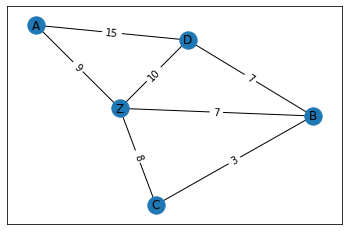

In [3]:
from collections import defaultdict


def bellman_ford(graph, weight, source, update_order=None):
    n = len(graph)
    dist = {node: float('inf') for node in graph}
    prec = {node: None for node in graph}
    dist[source] = 0

    if update_order is not None:
        if set(update_order) != set(graph):
            raise ValueError(
                'Nodes of update_order not the same as nodes of graph'
            )
    else:
        update_order = tuple(graph)

    for iteration in range(n):
        print(f'ITERATION {iteration}')
        changed = False
        for node in graph:
            print(f'Updating node {node}...')
            for neighbor in graph[node]:
                alt = dist[neighbor] + weight[neighbor][node]
                print(f'\tIncoming from neighbor {neighbor}.', end=' ')
                if alt < dist[node]:
                    print(

                        f'Found better path.  \t'
                        f'dist[{neighbor}] + {neighbor}-->{node}'
                        f' = {dist[neighbor]} + {weight[neighbor][node]} = {alt}'
                        f' < dist[{node}] = {dist[node]}'
                    )
                    dist[node] = alt
                    prec[node] = neighbor
                    changed = True
                else:
                    print(
                        'No better path found.\t'
                        f'dist[{neighbor}] + {neighbor}-->{node}'
                        f' = {dist[neighbor]} + {weight[neighbor][node]} = {alt}'
                        f' >= dist[{node}] = {dist[node]}'
                    )
        if not changed:
            return dist, prec, False
        print('-' * 30)
    return dist, prec, True


def create_graph(edges):
    weight = defaultdict(dict)
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append(v)
        graph[v].append(u)
        weight[u][v] = w
        weight[v][u] = w
    return graph, weight


def draw_graph(edges):
    try:
        import networkx as nx
    except ImportError:
        print('networkx not installed. Cannot plot the graph')
        return
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels)


def bellman_cheat(edges, update_order):
    draw_graph(edges)
    dist, prec, stopped_early = bellman_ford(
        *create_graph(edges),
        source=source, update_order=update_order
    )
    print()
    print(f'Distances: {dist}')
    print(f'Precursors: {prec}')


if __name__ == '__main__':
    edges = (
        ('A', 'D', 15),
        ('D', 'B', 7),
        ('B', 'Z', 7),
        ('Z', 'A', 9),
        ('D', 'Z', 10),
        ('B', 'C', 3),
        ('Z', 'C', 8),
    )
    source = 'A'
    # Always put the source node first in order if its order is not specified
    update_order = (source, 'D', 'B', 'C', 'D', 'Z')

    bellman_cheat(edges, update_order=update_order)